# BANK LONG TERM INVESTOR DETECTION

EliteBank our partner aims to leverage machine learning to predict long-term investor
prospects while integrating robust MLOps practices. This plan emphasizes
automated model tracking with MLflow, version control continuous integration using
GitHub, and an interactive deployment interface via Streamlit. The objective is to
streamline model development, ensure reproducibility, and deliver an engaging user
interface for business stakeholders.
Key Deliverables
1. Exploratory Data Analysis (EDA) Report:
○
Well-detailed insights into client demographics, financial history, and
deposit patterns.
○
Visualizations to identify trends, correlations, and anomalies.
2. Feature Engineering & Selection Documentation:
○
Comprehensive documentation of feature extraction, engineering, and
selection processes.
○
Version-controlled scripts for reproducibility and auditability.
3. Predictive ML Model:
○
A high-specificity model predicts the probability of a client becoming a
long-term investor.
○
Performance metrics (e.g., specificity, ROC-AUC) validated through
cross-validation.
4. Model Explainability:
○
Integration of tools (such as SHAP or LIME) to provide insights into key
drivers of model predictions.
○
Visual and textual reports explaining model behavior for stakeholder
clarity.
5. MLOps Infrastructure:
○
MLflow Integration: Track experiments, models, and data versions to
maintain a robust history of model development.
○
GitHub Version Control & CI/CD: Utilize GitHub for managing code
repositories and automating tests, builds, and deployments.
○
Deployment via Streamlit: Develop an interactive web interface that
displays model predictions and insights in real-time.
○
Monitoring & Logging: Basic monitoring of deployed applications,
ensuring performance and reliability in production.
1
6. Final Documentation & Presentation:
○
A comprehensive report summarizing methodologies, key insights, and
strategic recommendations.
○
A deployment roadmap with instructions for maintaining and updating
the system.
Tools and Technologies
●
●
●
●
Programming & Data Analysis:
○
Python Libraries: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn,
SHAP, LIME
MLOps & Version Control:
○
MLflow: For experiment tracking, model versioning, and artifact
management.
○
GitHub: For source code version control, CI/CD pipeline setup, and
collaborative development.
Deployment:
○
Streamlit: For building and deploying an interactive web application
that allows stakeholders to explore model predictions.
Development Environment:
○
Jupyter Notebooks or equivalent IDE for iterative development.

#### 1) Import Required Packages

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import arff


#### 1.1) Import the dataset and show top 5 records

In [3]:
with open("dataset/Bank_Marketing_Dataset.arff","r") as f:
    dataset=arff.load(f)

df = pd.DataFrame(dataset['data'],columns=[attr[0] for attr in dataset['attributes']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### 1.2) Dataset Information

In [4]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### 1.3) Shape of The Dataste

In [5]:
# Check for the Number of Columns and rows
df.shape

(11162, 17)

#### 1.4) Dataset Statistics

In [6]:
# Check the Statistics of the Dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### 1.5) Sum of Missing Values from Each Column

In [7]:
# Check for Missing Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no Missing Values

#### 1.6) Check for Duplicate Values

In [8]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicates

#### 1.7) Checking The Number of Unique Values within each Column

In [9]:
# Checking for Unique Values
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

#### 2) Exploring The Dataset

In [10]:
print("Categories in 'job' variable:   ",end=" ")
print(df['job'].unique())

print("Categories in 'marital' variable: ", end=" ")
print(df["marital"].unique())

print("Categories in 'education' variable: ", end=" ")
print(df['education'].unique())

print("Categories in 'default' variable: ", end=" ")
print(df['default'].unique())

print("Categories in 'housing' variable: ", end=" ")
print(df['housing'].unique())

print("Categories in 'loan' variable:   ",end=" ")
print(df['loan'].unique())

print("Categories in 'contact' variable: ", end=" ")
print(df["contact"].unique())

print("Categories in 'deposit' variable: ", end=" ")
print(df['poutcome'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['deposit'].unique())

Categories in 'job' variable:    ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Categories in 'marital' variable:  ['married' 'single' 'divorced']
Categories in 'education' variable:  ['secondary' 'tertiary' 'primary' 'unknown']
Categories in 'default' variable:  ['no' 'yes']
Categories in 'housing' variable:  ['yes' 'no']
Categories in 'loan' variable:    ['no' 'yes']
Categories in 'contact' variable:  ['unknown' 'cellular' 'telephone']
Categories in 'deposit' variable:  ['unknown' 'other' 'failure' 'success']
Categories in 'lunch' variable:  ['yes' 'no']


In [ ]:
# Define the Numerical and Categorical Columns
numerical_column = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_column = [ feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Numerical Features: {numerical_column}")
print(f"Categorical Features: {categorical_column}")

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


#### 3) Data Visualisation

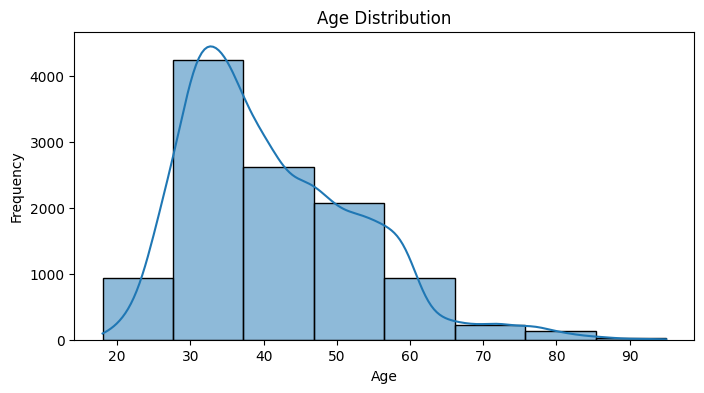

In [14]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'],bins=8, kde=True)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

More Investment from Clients in their 30s

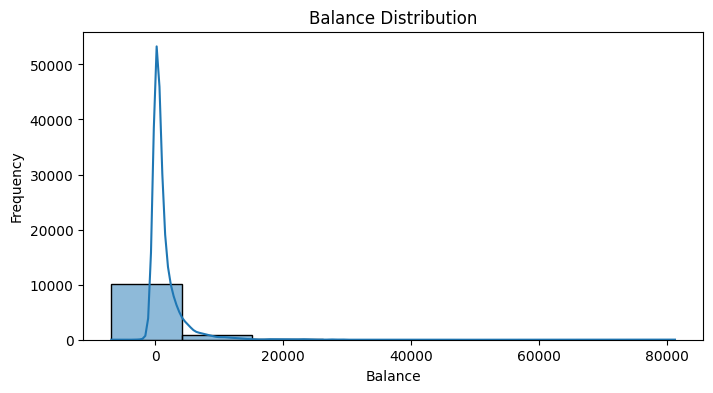

In [19]:
# Balance Distribution of Clients
plt.figure(figsize=(8,4))
sns.histplot(df['balance'],bins=8,kde=True)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

The Balance between 0 to 20000 occurred more frquently

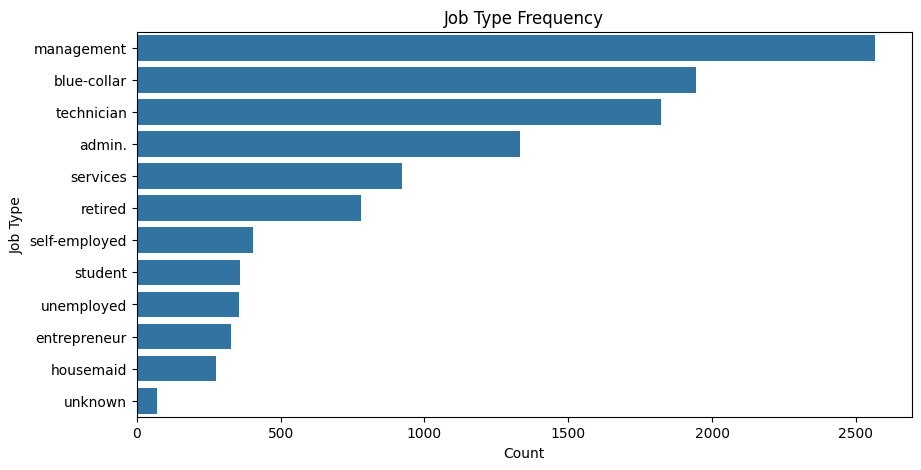

In [20]:
# Job Type Count
plt.figure(figsize=(10, 5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Job Type Frequency')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()


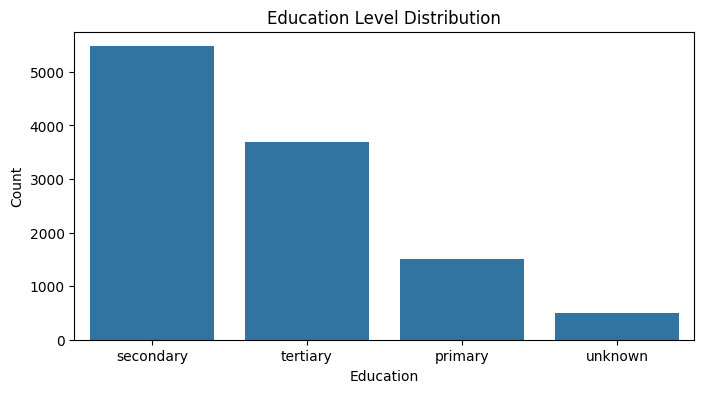

In [21]:
# Education Level Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='education', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

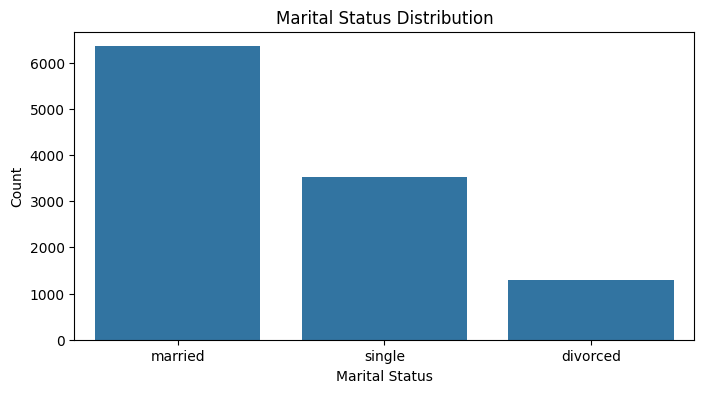

In [22]:
# Marital Status Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

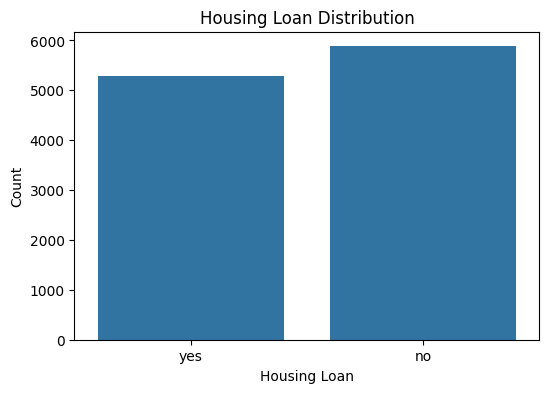

In [23]:
# Housing Loan Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', data=df)
plt.title('Housing Loan Distribution')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

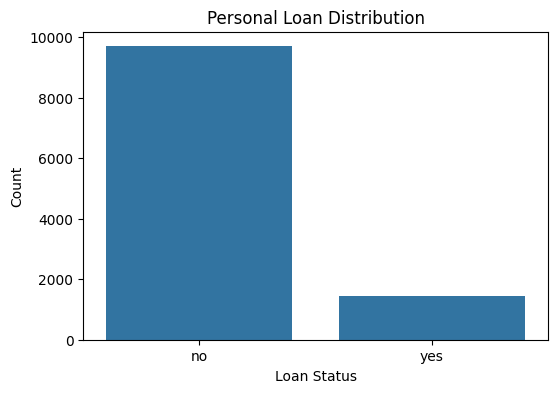

In [24]:
# Loan Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', data=df)
plt.title('Personal Loan Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

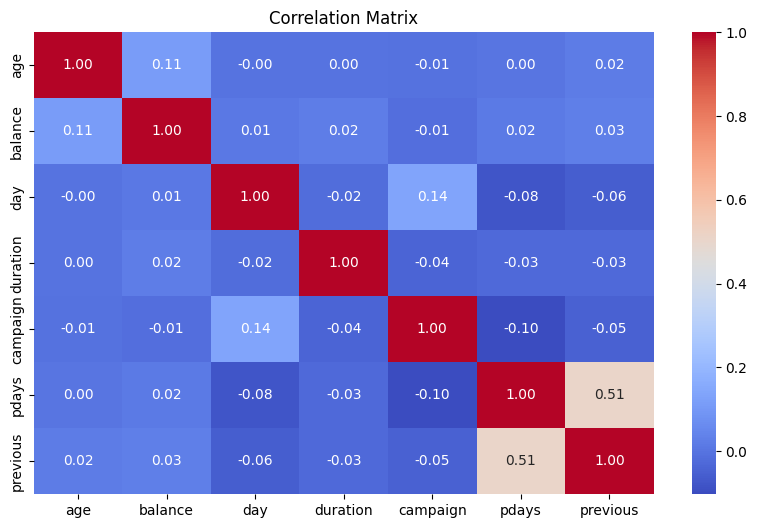

In [28]:
# Correlation Heatmap to visualize numeric correlations
numeric_df = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

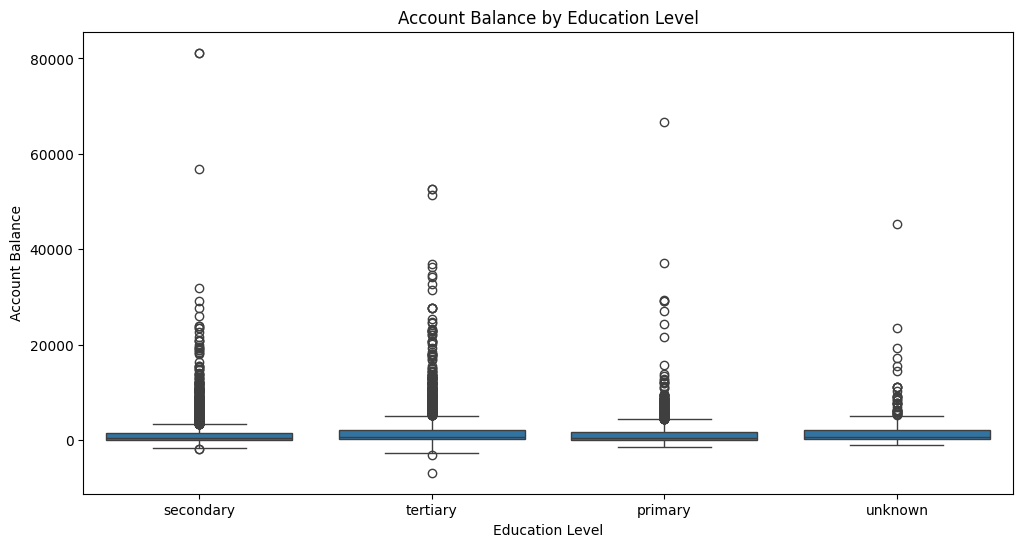

In [30]:
# Balance Distribution by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='balance', data=df)
plt.title('Account Balance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Account Balance')
plt.show()